In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import math

# Period doubling bifurcation
Input : -A*cos(Beta * t) + A * c<br>

where A : Amplitude = 50 nM<br>
 ----------     Beta : 2*pi/p => p is period of input<br>
 ----------     c : 10^-9<br>


## Defining equations
1. p=2.8*10^4 s

In [ ]:

def I(t):
  p = 2.8E+4 # period
  c = 1E-9
  a = 50
  f = -a*math.cos(2*(math.pi)*t/p) + a + c
  return f

def hposr(x): # THis is for all repressors Positive hill function
  N=1.3
  ka=0.6 #nM 
  hill = x**N/(ka**N+x**N)
  return hill
'''
a= hposr(10) # Just testing hposr function
print(a)
'''
def hnegr(x): # Thus is for repressors Negative hill function
  N=1.3
  ka=0.6 #nM 
  hill = 1/(1+(x**N/ka**N))
  return hill

def hposa(x): #This is for input signal Positive Hill function
  N=1.3
  ka=20.0 #nM 
  hill2 = x**N/(ka**N+x**N)
  #print(hill2)
  return hill2

#b=hposa(10.1) # Just testing hposa function
#print(b)

def func(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,700000,7000000)
x = odeint(func,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




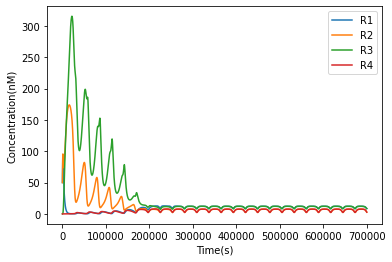

In [ ]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

## Finding period

In [ ]:
i1=np.where(r2==min(r2))
i2=np.where(r1==min(r1))
print(i1)
print(i2)
tmax=t1[i1]
tmin=t1[i2]
print(tmax)
print(tmin)
period_1=(tmax-tmin)/7
print(period_1)

(array([2250534]),)
(array([288680]),)
[225053.43215049]
[28868.004124]
[28026.48971807]


## Finding L2 norm

In [ ]:
# modified r3 and r4
r3_mod=[]
r4_mod=[]
for i in range(2000000,3000000):
  r3_mod.append(r3[i])
  r4_mod.append(r4[i])

l2_norm1= math.sqrt((2*max(r4_mod)**2)+(2*max(r3_mod)**2))
print(l2_norm1)

21.801146404181186


## Defining equations
2. p=2.4*10^4 s

In [ ]:

def I1(t):
  p = 2.4E+4 # period
  c = 1E-9
  a = 50
  f = -a*math.cos(2*(math.pi)*t/p) + a + c
  return f

def func1(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I1(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I1(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I1(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I1(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,700000,7000000)
x = odeint(func1,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




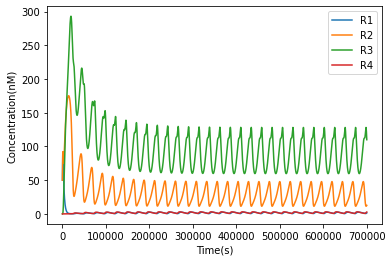

In [ ]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

## Finding period

In [ ]:
i1=np.where(r2==min(r2))
i2=np.where(r1==min(r1))
print(i1)
print(i2)
tmax=t1[i1]
tmin=t1[i2]
period_2=(tmax-tmin)/28
print(period_2)

(array([6984565]),)
(array([249117]),)
[24055.17486502]


## Finding L2 norm

In [ ]:
# modified r3,r2 and r4
r3_mod=[]
r4_mod=[]
r2_mod=[]
for i in range(2000000,3000000):
  r3_mod.append(r3[i])
  r4_mod.append(r4[i])
  r2_mod.append(r2[i])

l2_norm2= math.sqrt(2*max(r4_mod)**2+(max(r3_mod)**2)+max(r2_mod)**2)
print(l2_norm2)

140.45294762725186


## Defining equations
3. p=3*10^4 s

In [ ]:

def I2(t):
  p = 3E+4 # period
  c = 1E-9
  a = 50
  f = -a*math.cos(2*(math.pi)*t/p) + a + c
  return f

def func2(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I2(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I2(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I2(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I2(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,700000,7000000)
x = odeint(func2,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




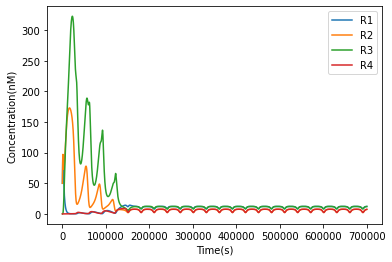

In [ ]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

## Finding period

In [ ]:
i1=np.where(r2==min(r2))
i2=np.where(r1==min(r1))
print(i1)
print(i2)
tmax=t1[i1]
tmin=t1[i2]
print(tmax)
print(tmin)
period_3=(tmax-tmin)/4
print(period_3)

(array([1509117]),)
(array([308656]),)
[150911.72155882]
[30865.60440937]
[30011.52928736]


## Finding L2 norm

In [ ]:
# modified r3 and r4
r3_mod=[]
r4_mod=[]
for i in range(2000000,3000000):
  r3_mod.append(r3[i])
  r4_mod.append(r4[i])

l2_norm3= math.sqrt((2*max(r4_mod)**2)+(2*max(r3_mod)**2))
print(l2_norm3)

20.68852489401234


## Defining equations
4. p=4*10^4 s

In [ ]:

def I3(t):
  p = 4E+4 # period
  c = 1E-9
  a = 50
  f = -a*math.cos(2*(math.pi)*t/p) + a + c
  return f

def func3(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I3(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I3(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I3(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I3(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,350000,3500000)
x = odeint(func3,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




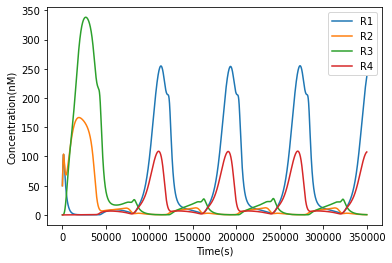

In [ ]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

## Finding period

In [ ]:
i1=np.where(r2==min(r2))
i2=np.where(r1==min(r1))
print(i1)
print(i2)
tmax=t1[i1]
tmin=t1[i2]
print(tmax)
print(tmin)
period_4=(tmax-tmin)/3
print(period_4)

(array([2740966]),)
(array([409014]),)
[274096.67831334]
[40901.41168612]
[77731.75554241]


## Finding L2 norm

In [ ]:
# modified r1,r2,r3 and r4
r3_mod=[]
r4_mod=[]
r1_mod=[]
r2_mod=[]
for i in range(1000000,3000000):
  r3_mod.append(r3[i])
  r2_mod.append(r2[i])
  r1_mod.append(r1[i])
  r4_mod.append(r4[i])

l2_norm4= math.sqrt((max(r4_mod)**2)+(max(r3_mod)**2)+max(r2_mod)**2+max(r1_mod)**2)
print(l2_norm4)

279.245061586578


## Defining equations
5. p=3.3*10^4 s 


In [ ]:

def I4(t):
  p = 3.3E+4 # period
  c = 1E-9
  a = 50
  f = -a*math.cos(2*(math.pi)*t/p) + a + c
  return f

def func4(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I4(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I4(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I4(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I4(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,700000,7000000)
x = odeint(func4,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




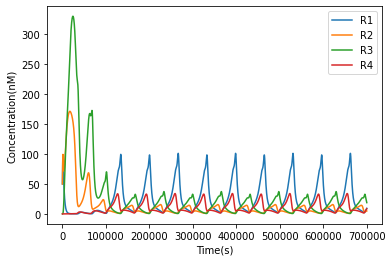

In [ ]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

## Finding period

In [ ]:
i1=np.where(r1==max(r1))
i2=np.where(r1==min(r1))
print(i1)
print(i2)
tmax=t1[i1]
tmin=t1[i2]
print(tmax)
print(tmin)
period_5=(tmax-tmin)/3.5
print(period_5)

(array([2662657]),)
(array([338723]),)
[266265.73803796]
[33872.3048389]
[66398.12377116]


## Finding L2 norm

In [ ]:
# modified r1,r2,r3 and r4
r3_mod=[]
r4_mod=[]
r1_mod=[]
r2_mod=[]
for i in range(2000000,3000000):
  r3_mod.append(r3[i])
  r2_mod.append(r2[i])
  r1_mod.append(r1[i])
  r4_mod.append(r4[i])

l2_norm5= math.sqrt((max(r4_mod)**2)+(max(r3_mod)**2)+max(r2_mod)**2+max(r1_mod)**2)
print(l2_norm5)

114.11186821961694


## Defining equations
6. p=3.05*10^4 s 
<b>Critical parameter</b>

In [ ]:

def I5(t):
  p = 3.05E+4 # period
  c = 1E-9
  a = 50
  f = -a*math.cos(2*(math.pi)*t/p) + a + c
  return f

def func5(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I5(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I5(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I5(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I5(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,500000,5000000)
x = odeint(func5,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




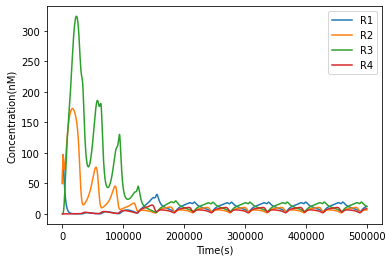

In [ ]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

## Finding period

In [ ]:
i1=np.where(r2==min(r2))
i2=np.where(r1==min(r1))
print(i1)
print(i2)
tmax=t1[i1]
tmin=t1[i2]
print(tmax)
print(tmin)
period_6=(tmax-tmin)/2
print(period_6)

(array([1525367]),)
(array([313661]),)
[152536.73050735]
[31366.10627322]
[60585.31211706]


## Finding L2 norm

In [ ]:
# modified r1,r2,r3 and r4
r3_mod=[]
r4_mod=[]
r1_mod=[]
r2_mod=[]
for i in range(1000000,3500000):
  r3_mod.append(r3[i])
  r2_mod.append(r2[i])
  r1_mod.append(r1[i])
  r4_mod.append(r4[i])

l2_norm6= math.sqrt((max(r4_mod)**2)+(max(r3_mod)**2)+max(r2_mod)**2+max(r1_mod)**2)
print(l2_norm6)

60.191320806596394


# Figures 7 A & B

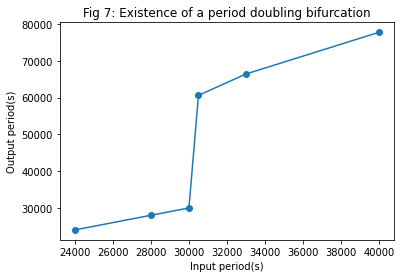

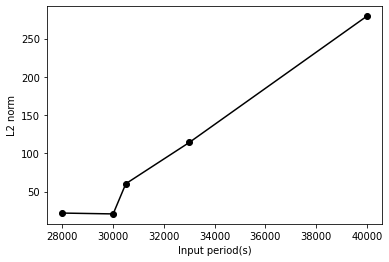

In [ ]:
x=[2.8E4,2.4E4,3E4,4E4,3.3E4,3.05E4]
x_mod= [2.4E4,2.8E4,3E4,3.05E4,3.3E4,4E4]
x_mod1=[2.8E4,3E4,3.05E4,3.3E4,4E4]
y_l2norm= [l2_norm1,l2_norm3,l2_norm6,l2_norm5,l2_norm4]
y_period=[period_2,period_1,period_3,period_6,period_5,period_4]

plot1=plt.figure(1)
plt.axvline(27400, 30000, 80000)
plt.plot(x_mod,y_period,marker='o')
plt.xlabel('Input period(s)')
plt.ylabel('Output period(s)')
plt.title('Fig 7: Existence of a period doubling bifurcation')

plot2=plt.figure(2)
plt.plot(x_mod1,y_l2norm,marker='o',color='black')
plt.xlabel('Input period(s)')
plt.ylabel('L2 norm')

plt.show()



> I found that the critical input period was <b>3.05X10^4s</b> as opposed to 2.75X10^4s cited in the paper.



